# 🧬Gene Expression Clustering 🧬

Submitted by : Sharon Jacquiline S


Project type : gene x patient matrix


Domain : Biotech


Dated on : 15/09/2025


GitHub Link : https://github.com/jacqlin13/gene_expr#gene_expr










# ✅ Phase 1: Problem Understanding


### 1.1 Define the Goal

The goal is to identify biologically meaningful groups of genes with similar expression patterns using hierarchical clustering on dimension-reduced (PCA) data from a gene x patient matrix, to gain insights into gene relationships in biotech.

### 1.2 Identify Use Cases: Business Value

The analysis aims to uncover business value in biotech through:

*   **Personalization:** Enabling tailored medical treatments based on genetic profiles.
*   **Optimization:** Streamlining drug discovery and development by identifying key genetic targets.
*   **Biomarker Discovery:** Finding genetic indicators for diagnosis, prognosis, and treatment response.
*   **Disease Subtype Identification:** Differentiating disease variations at a molecular level for targeted interventions.

### 1.3 Stakeholders

Key stakeholders interested in the results include:

*   Research Scientists
*   Biologists
*   Data Scientists
*   Clinicians
*   Drug Development Teams

# 🧹 Phase 2: Data Collection & Preparation

### 2.1 Data Sources

In [ ]:
# @title Mount Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Import Data:
import pandas as pd

# Specify the path to your Excel file in Google Drive
excel_file_path = '/content/drive/MyDrive/data.xlsx'

# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(excel_file_path)
    print("Excel file 'data.xlsx' imported successfully!")
    # Display the first few rows of the DataFrame to verify
    display(df.head())
    # Display the first 50 rows of the DataFrame
    display(df.head(50))
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Excel file 'data.xlsx' imported successfully!


Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999       0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011       0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730       0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184       0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265       0   

     gene_6    gene_7  gene_8  ...  gene_16373  gene_16374  gene_16375  \
0  7.175175  0.591871     0.0  ...    8.750533    7.421257    4.692126   
1  6.816049  0.000000     0.0  ...    6.638879    7.991732    5.709045   
2  6.972130  0.452595     0.0  ...    8.205754   10.375778    1.839758   
3  7.843375  0.434882     0.0  ...    8.093185    8.424771    5.502251   
4  6.566967  0.360982     0.0  ...    7.522228   12.176650   10.305423   

   gene_16376  gene_16377  gene_16378  gene_16379  gene_16380  gene_16381  \
0    1.334282    1.650856    3.973382    0.000000    9.291933    0.840926   
1    0.811142    2.717824    3.255773    1.590818    3.467410    1.178045   
2    0.000000    3.004897    0.796598    0.000000    5.533710    0.225892   
3    0.434882    2.207862    1.039419    0.000000    8.358278    0.377401   
4    0.360982    1.099497    0.360982    0.649386    9.315607    1.052833   

   gene_16382  
0    7.886642  
1    8.864223  
2    9.843799  
3    7.701320  
4   10.646325  

[5 rows x 16384 columns]

Unnamed: 0    gene_0    gene_1    gene_2     gene_3     gene_4  gene_5  \
0    sample_0  0.000000  2.017209  3.265527   5.478487  10.431999       0   
1    sample_1  0.000000  0.592732  1.588421   7.586157   9.623011       0   
2    sample_2  0.000000  3.511759  4.327199   6.881787   9.870730       0   
3    sample_3  0.000000  3.663618  4.507649   6.659068  10.196184       0   
4    sample_4  0.000000  2.655741  2.821547   6.539454   9.738265       0   
5    sample_5  0.000000  3.467853  3.581918   6.620243   9.706829       0   
6    sample_6  0.000000  1.224966  1.691177   6.572007   9.640511       0   
7    sample_7  0.000000  2.854853  1.750478   7.226720   9.758691       0   
8    sample_8  0.000000  3.992125  2.772730   6.546692  10.488252       0   
9    sample_9  0.000000  3.642494  4.423558   6.849511   9.464466       0   
10  sample_10  0.000000  3.492071  3.553373   7.151707  10.253446       0   
11  sample_11  0.000000  2.941181  2.663276   6.561690   9.376293       0   
12  sample_12  0.000000  3.970348  2.364292   7.145443   9.240605       0   
13  sample_13  0.000000  1.551048  3.529846   6.326825  10.633849       0   
14  sample_14  0.000000  1.964842  2.183010   6.596832  10.248141       0   
15  sample_15  0.000000  2.901379  3.685368   6.669665   9.999098       0   
16  sample_16  0.000000  3.460913  3.618474   5.661048   9.731217       0   
17  sample_17  0.000000  3.004519  3.007178   6.524205   9.062661       0   
18  sample_18  0.000000  1.541465  2.541540   6.843255   9.444468       0   
19  sample_19  0.000000  4.167583  3.841389   6.976123   9.982252       0   
20  sample_20  0.000000  2.066916  2.619953   6.757997  11.123940       0   
21  sample_21  0.000000  3.529783  2.976712   6.038416   9.437973       0   
22  sample_22  0.000000  1.131853  2.351515   6.845841   9.196860       0   
23  sample_23  0.000000  3.121844  2.473943   7.119616  10.732490       0   
24  sample_24  0.000000  4.801852  2.648465   6.009255   9.611917       0   
25  sample_25  0.341758  4.317702  3.642678   6.790003   8.435999       0   
26  sample_26  0.000000  2.325242  3.247092   8.174007  10.065053       0   
27  sample_27  0.000000  0.657091  1.026304   5.411196   9.601388       0   
28  sample_28  0.000000  3.670081  3.382792   7.581939   9.386658       0   
29  sample_29  0.000000  5.688295  4.899949  10.129528  10.093695       0   
30  sample_30  0.000000  2.662479  2.742869   6.394970  10.323438       0   
31  sample_31  0.000000  2.090786  3.769116   6.221676   9.662848       0   
32  sample_32  0.000000  0.000000  2.499578   6.950748   9.390092       0   
33  sample_33  0.000000  0.000000  1.633152   6.641754   9.893421       0   
34  sample_34  0.631523  3.190220  5.690191   5.770615   9.207844       0   
35  sample_35  0.000000  2.464721  3.254080   6.326744  10.193969       0   
36  sample_36  0.000000  3.384243  2.673624   6.679832   8.946760       0   
37  sample_37  0.000000  4.416259  4.188978   6.664198   9.070819       0   
38  sample_38  0.000000  0.000000  2.722750   7.266609   9.978038       0   
39  sample_39  0.000000  0.000000  2.536525   6.924314  10.790129       0   
40  sample_40  0.000000  3.729379  2.293871   6.505710   8.555398       0   
41  sample_41  0.000000  3.026375  4.364103   7.164917   9.552402       0   
42  sample_42  0.000000  4.618861  5.648986   6.585819   9.995287       0   
43  sample_43  0.000000  3.757322  3.231048   6.722958   9.184962       0   
44  sample_44  0.000000  3.472410  3.007465   6.662462   9.188460       0   
45  sample_45  0.000000  3.092055  2.210327   5.884849  10.165234       0   
46  sample_46  0.000000  1.149259  2.575385   7.397529  10.284535       0   
47  sample_47  0.000000  3.446190  3.620962   7.171917   9.796559       0   
48  sample_48  0.000000  3.768449  2.736172   6.698538  10.002281       0   
49  sample_49  0.000000  4.577822  3.800237   7.280780  10.153223       0   

       gene_6    gene_7    gene_8  ...  gene_16373  gene_16374  gene_16375 

In [ ]:
# @title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

### 2.2 Data Cleaning

In [ ]:
# @title Handle missing values:
# Set the 'Unnamed: 0' column as the index
if 'Unnamed: 0' in df.columns:
    df.set_index('Unnamed: 0', inplace=True)
    print("Set 'Unnamed: 0' as index.")

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing values found per column:")
    display(missing_values)

# Display the first few rows after setting index
display(df.head())

Set 'Unnamed: 0' as index.

No missing values found in the dataset.


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
Unnamed: 0                                                                      
sample_0       0.0  2.017209  3.265527  5.478487  10.431999       0  7.175175   
sample_1       0.0  0.592732  1.588421  7.586157   9.623011       0  6.816049   
sample_2       0.0  3.511759  4.327199  6.881787   9.870730       0  6.972130   
sample_3       0.0  3.663618  4.507649  6.659068  10.196184       0  7.843375   
sample_4       0.0  2.655741  2.821547  6.539454   9.738265       0  6.566967   

              gene_7  gene_8  gene_9  ...  gene_16373  gene_16374  gene_16375  \
Unnamed: 0                            ...                                       
sample_0    0.591871     0.0     0.0  ...    8.750533    7.421257    4.692126   
sample_1    0.000000     0.0     0.0  ...    6.638879    7.991732    5.709045   
sample_2    0.452595     0.0     0.0  ...    8.205754   10.375778    1.839758   
sample_3    0.434882     0.0     0.0  ...    8.093185    8.424771    5.502251   
sample_4    0.360982     0.0     0.0  ...    7.522228   12.176650   10.305423   

            gene_16376  gene_16377  gene_16378  gene_16379  gene_16380  \
Unnamed: 0                                                               
sample_0      1.334282    1.650856    3.973382    0.000000    9.291933   
sample_1      0.811142    2.717824    3.255773    1.590818    3.467410   
sample_2      0.000000    3.004897    0.796598    0.000000    5.533710   
sample_3      0.434882    2.207862    1.039419    0.000000    8.358278   
sample_4      0.360982    1.099497    0.360982    0.649386    9.315607   

            gene_16381  gene_16382  
Unnamed: 0                          
sample_0      0.840926    7.886642  
sample_1      1.178045    8.864223  
sample_2      0.225892    9.843799  
sample_3      0.377401    7.701320  
sample_4      1.052833   10.646325  

[5 rows x 16383 columns]

In [ ]:
# @title Transpose data:
# Transpose the DataFrame
df_transposed = df.T

print("DataFrame transposed successfully. The shape of the transposed DataFrame is:")
print(df_transposed.shape)

# Display the first few rows of the transposed DataFrame
display(df_transposed.head())

DataFrame transposed successfully. The shape of the transposed DataFrame is:
(16383, 801)


Unnamed: 0   sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0       0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1       2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2       3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3       5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4      10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

Unnamed: 0  sample_6  sample_7   sample_8  sample_9  ...  sample_791  \
gene_0      0.000000  0.000000   0.000000  0.000000  ...    0.000000   
gene_1      1.224966  2.854853   3.992125  3.642494  ...    3.080061   
gene_2      1.691177  1.750478   2.772730  4.423558  ...    2.815739   
gene_3      6.572007  7.226720   6.546692  6.849511  ...    6.209617   
gene_4      9.640511  9.758691  10.488252  9.464466  ...    9.644469   

Unnamed: 0  sample_792  sample_793  sample_794  sample_795  sample_796  \
gene_0        0.000000    0.000000    0.000000    0.436588    0.000000   
gene_1        4.337404    2.068224    4.288388    4.472176    1.865642   
gene_2        2.597126    0.857663    3.452490    4.908746    2.718197   
gene_3        6.070379    6.218739    7.209151    5.937848    7.350099   
gene_4        9.863990   10.623068    9.875620    9.330901   10.006003   

Unnamed: 0  sample_797  sample_798  sample_799  sample_800  
gene_0        0.000000    0.000000    0.000000    0.000000  
gene_1        3.942955    3.249582    2.590339    2.325242  
gene_2        4.453807    3.707492    2.787976    3.805932  
gene_3        6.346597    8.185901    7.318624    6.530246  
gene_4       10.056868    9.504082    9.987136    9.560367  

[5 rows x 801 columns]

### 2.3 Feature Engineering


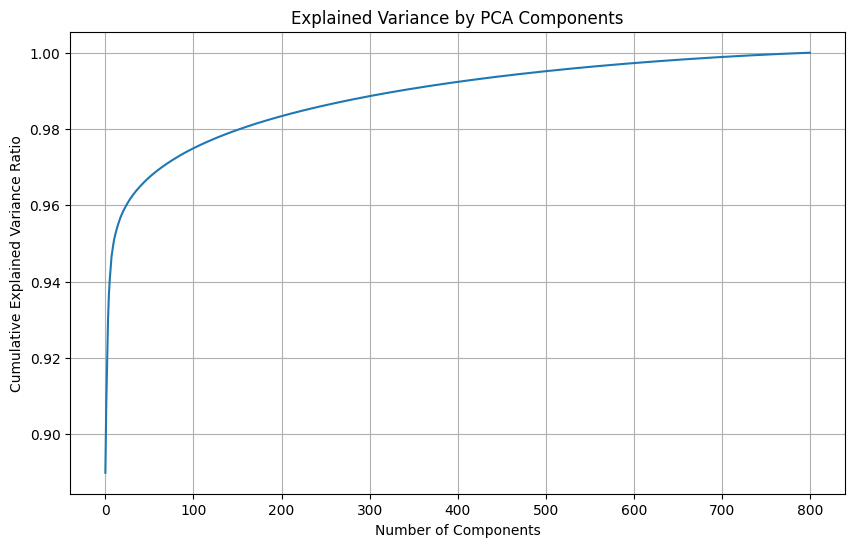

PCA fitted successfully.
Total number of components: 801
Cumulative explained variance by first 5 components: 0.9367
Cumulative explained variance by first 50 components: 0.9672


In [ ]:
# @title Dimensionality reduction by PCA:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA
# We'll start by keeping all components to examine explained variance
pca = PCA()

# Fit PCA on the transposed data (genes as rows, samples as columns)
# It's good practice to scale the data before PCA, but given the nature of gene expression data
# where values are often relative, we might choose not to scale initially or use a specific method.
# For this example, let's proceed without explicit scaling for now, assuming the data is already in a comparable range.
# If needed, scaling can be added here using StandardScaler from sklearn.preprocessing

pca.fit(df_transposed)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

print("PCA fitted successfully.")
print(f"Total number of components: {pca.n_components_}")
print(f"Cumulative explained variance by first 5 components: {np.cumsum(explained_variance_ratio[:5])[-1]:.4f}")
print(f"Cumulative explained variance by first 50 components: {np.cumsum(explained_variance_ratio[:50])[-1]:.4f}")

# We will use the plot to decide on the number of components for the next step.

### 2.4 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the transposed DataFrame
df_scaled = scaler.fit_transform(df_transposed)

print("Data standardized successfully.")
print("Shape of the scaled data:", df_scaled.shape)

Data standardized successfully.
Shape of the scaled data: (16383, 801)


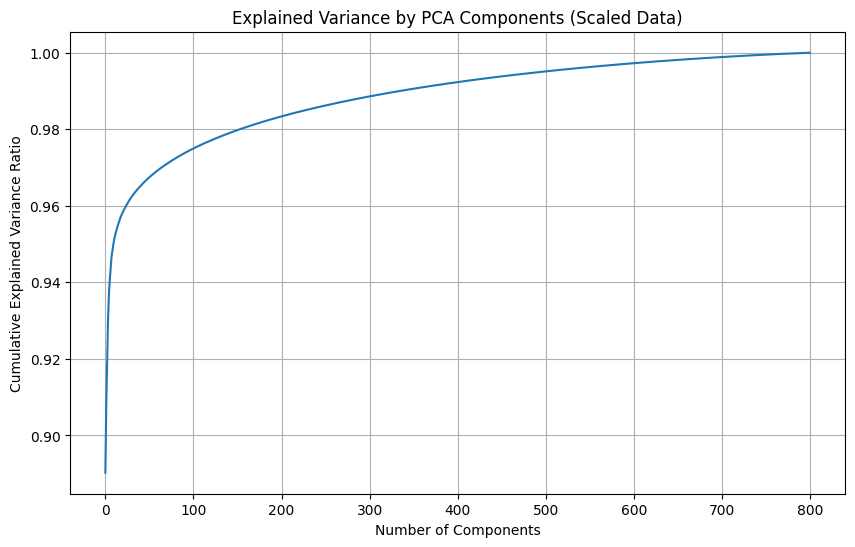

PCA fitted successfully on scaled data.
Total number of components: 801
Cumulative explained variance by first 5 components: 0.9368
Cumulative explained variance by first 50 components: 0.9673


In [ ]:
# @title Variance ratio:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA
# We'll keep all components initially to examine explained variance
pca_scaled = PCA()

# Fit PCA on the scaled data
pca_scaled.fit(df_scaled)

# Explained variance ratio
explained_variance_ratio_scaled = pca_scaled.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio_scaled))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components (Scaled Data)')
plt.grid(True)
plt.show()

print("PCA fitted successfully on scaled data.")
print(f"Total number of components: {pca_scaled.n_components_}")
print(f"Cumulative explained variance by first 5 components: {np.cumsum(explained_variance_ratio_scaled[:5])[-1]:.4f}")
print(f"Cumulative explained variance by first 50 components: {np.cumsum(explained_variance_ratio_scaled[:50])[-1]:.4f}")

# We will use the plot to decide on the number of components for the next step.

# 📊 Phase 3: Exploratory Data Analysis (EDA)

### 3.1 Summary Statistics

In [ ]:

# Apply PCA transformation with 50 components to the scaled data
pca_final = PCA(n_components=50)
df_pca = pca_final.fit_transform(df_scaled)

# Convert the PCA-transformed data back to a DataFrame for easier analysis
df_pca = pd.DataFrame(df_pca, index=df_transposed.index)

print("PCA transformation applied with 50 components.")
print("Shape of the PCA-transformed data:", df_pca.shape)

# Calculate and display summary statistics for the PCA-transformed data
print("\nSummary Statistics for PCA-transformed data:")
display(df_pca.describe())

PCA transformation applied with 50 components.
Shape of the PCA-transformed data: (16383, 50)

Summary Statistics for PCA-transformed data:


0             1             2             3             4   \
count  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04   
mean  -6.106599e-16  7.078104e-16  4.510556e-16 -1.491953e-16 -7.633249e-16   
std    2.670491e+01  3.762992e+00  3.075762e+00  2.882681e+00  2.316433e+00   
min   -4.498898e+01 -2.883581e+01 -2.329423e+01 -2.825938e+01 -3.087797e+01   
25%   -2.438545e+01 -1.365041e+00 -1.193271e+00 -1.102195e+00 -7.007534e-01   
50%    7.133430e+00 -3.888337e-01 -1.804783e-01 -9.070296e-02  4.772425e-01   
75%    2.182140e+01  1.160248e+00  1.145947e+00  1.129605e+00  1.061439e+00   
max    6.976669e+01  2.894802e+01  3.479699e+01  2.442932e+01  1.428335e+01   

                 5             6             7             8             9   \
count  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04   
mean  -4.857522e-16  8.882326e-16  2.775727e-16 -2.463458e-16 -6.939317e-17   
std    1.768322e+00  1.553789e+00  1.536942e+00  1.157306e+00  1.089400e+00   
min   -9.008634e+00 -1.063712e+01 -1.416974e+01 -8.391081e+00 -6.496765e+00   
25%   -1.040200e+00 -5.563677e-01 -6.704970e-01 -4.124278e-01 -5.283084e-01   
50%   -8.573558e-02  3.962508e-01 -1.078913e-01 -2.439650e-02  1.705668e-01   
75%    1.082723e+00  8.641333e-01  6.599872e-01  5.410369e-01  6.094208e-01   
max    9.244674e+00  7.010467e+00  1.099465e+01  7.650424e+00  5.882968e+00   

       ...            40            41            42            43  \
count  ...  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04   
mean   ... -1.337987e-15 -1.123302e-16  6.063229e-16 -5.529769e-16   
std    ...  4.457538e-01  4.425277e-01  4.382291e-01  4.351243e-01   
min    ... -3.594195e+00 -3.821591e+00 -2.891478e+00 -3.764392e+00   
25%    ... -1.988915e-01 -2.104532e-01 -2.028909e-01 -2.083987e-01   
50%    ... -5.363391e-03 -1.411360e-02 -7.934403e-03 -2.806075e-02   
75%    ...  1.962702e-01  1.992365e-01  2.022668e-01  2.019530e-01   
max    ...  5.979441e+00  4.284390e+00  3.403179e+00  4.966109e+00   

                 44            45            46            47            48  \
count  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04  1.638300e+04   
mean  -3.638805e-16  1.448583e-16  3.599771e-16 -1.832414e-16 -5.733611e-16   
std    4.318519e-01  4.302686e-01  4.250796e-01  4.220591e-01  4.166703e-01   
min   -3.216741e+00 -5.679804e+00 -4.882326e+00 -3.292423e+00 -2.786296e+00   
25%   -1.917952e-01 -2.070766e-01 -1.849327e-01 -1.900168e-01 -2.095949e-01   
50%    3.738249e-02 -1.759850e-02  9.593706e-03  6.493386e-04  2.780037e-02   
75%    2.117270e-01  2.169347e-01  1.925324e-01  1.999135e-01  2.152982e-01   
max    2.556529e+00  3.018816e+00  5.998802e+00  3.848398e+00  2.709972e+00   

                 49  
count  1.638300e+04  
mean   2.602244e-17  
std    4.129613e-01  
min   -3.656170e+00  
25%   -1.949495e-01  
50%   -2.223807e-02  
75%    1.929095e-01  
max    3.272884e+00  

[8 rows x 50 columns]

### 3.2 Pair Plots & Heatmaps

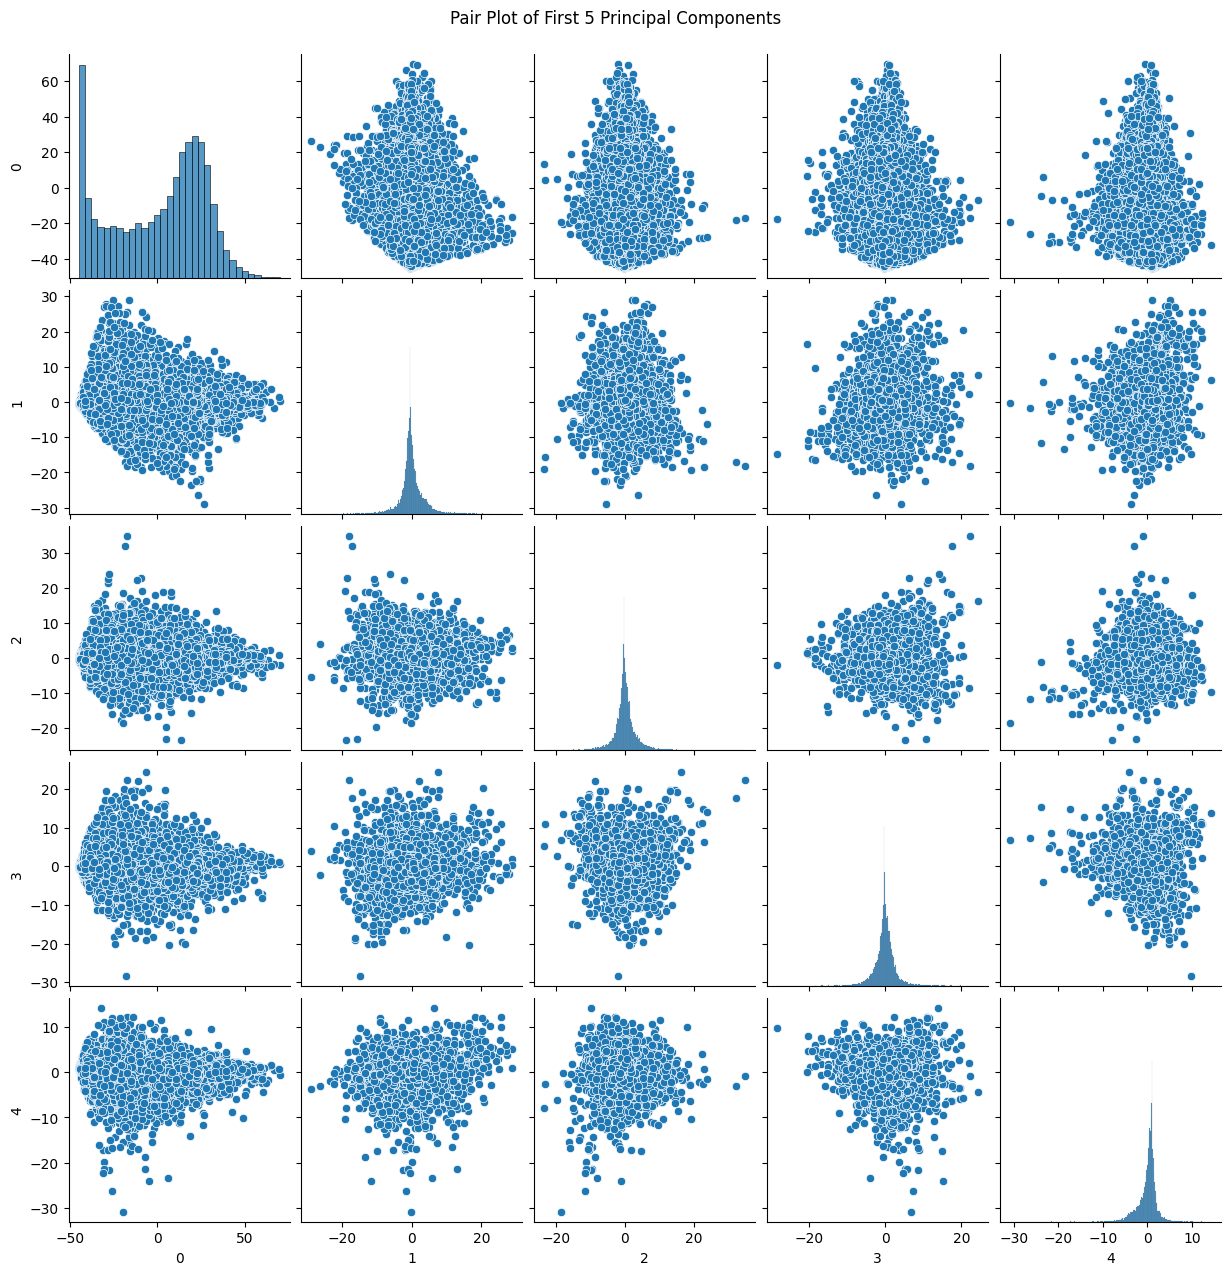

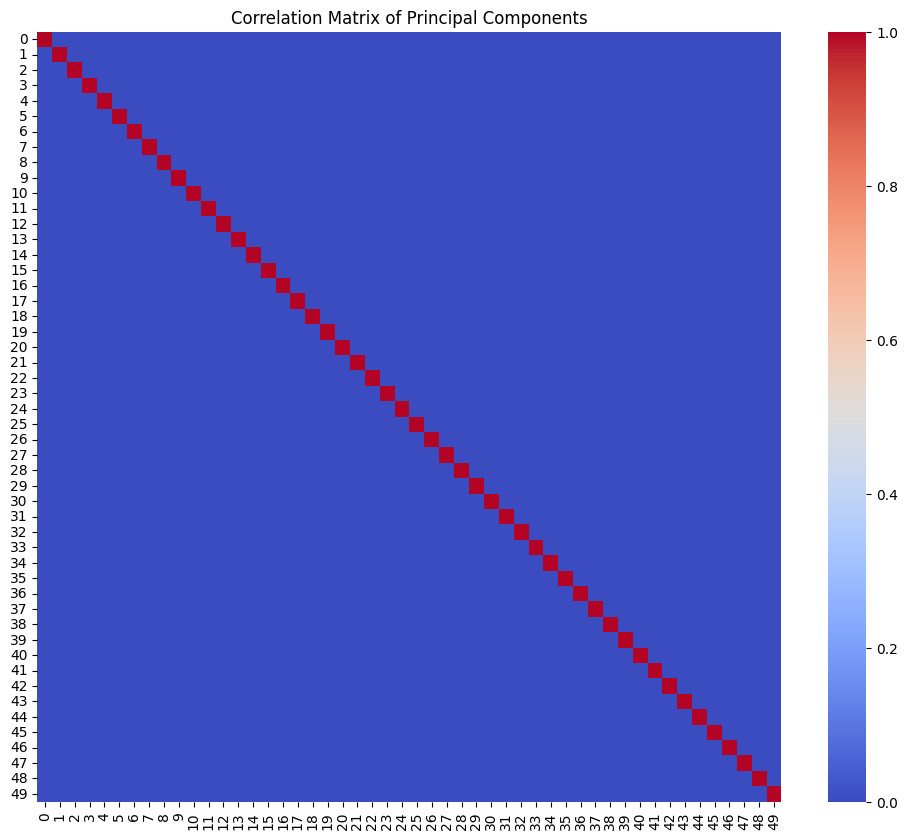

In [ ]:
# Generate Pair Plot for the first few principal components
# We'll plot the first 5 components for manageability
sns.pairplot(df_pca.iloc[:, :5])
plt.suptitle('Pair Plot of First 5 Principal Components', y=1.02)
plt.show()

# Calculate and visualize the correlation matrix of the PCA-transformed data
plt.figure(figsize=(12, 10))
sns.heatmap(df_pca.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Principal Components')
plt.show()

In [ ]:
# @title Interactive visuals:
import plotly.express as px
import plotly.graph_objects as go

# Interactive Pair Plot for the first few principal components
# We'll plot the first 5 components for manageability
fig_pair = px.scatter_matrix(df_pca.iloc[:, :5], title='Interactive Pair Plot of First 5 Principal Components')
fig_pair.update_layout(
    height=800, width=800 # Adjust size as needed
)
fig_pair.show()

# Interactive Correlation Heatmap of Principal Components
correlation_matrix = df_pca.corr()
fig_heatmap = go.Figure(data=go.Heatmap(
                       z=correlation_matrix.values,
                       x=correlation_matrix.columns,
                       y=correlation_matrix.index,
                       colorscale='bluered', # Corrected colorscale name
                       colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(
    title='Interactive Correlation Matrix of Principal Components',
    xaxis_nticks=36,
    yaxis_nticks=36,
    height=800, width=900 # Adjust size as needed
)
fig_heatmap.show()

### 3.3 Outlier Detection

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for each principal component
z_scores = np.abs(zscore(df_pca))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Identify outliers - rows where at least one principal component has a Z-score above the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Get the unique indices of the outlier genes
unique_outlier_indices = np.unique(outlier_indices)

# Get the names of the outlier genes
outlier_genes = df_pca.index[unique_outlier_indices]

print(f"Identified {len(outlier_genes)} potential outlier genes based on a Z-score threshold of {threshold}.")

# Display the names of the first 10 potential outlier genes
if len(outlier_genes) > 0:
    print("\nFirst 10 potential outlier genes:")
    display(outlier_genes[:10])

# You can further investigate these outlier genes if needed.

Identified 3926 potential outlier genes based on a Z-score threshold of 3.

First 10 potential outlier genes:


Index(['gene_6', 'gene_18', 'gene_20', 'gene_21', 'gene_26', 'gene_28',
       'gene_30', 'gene_31', 'gene_33', 'gene_44'],
      dtype='object')

# 🔎 Phase 4: Clustering (Core ML Phase)

### 4.1 K-Means Clustering

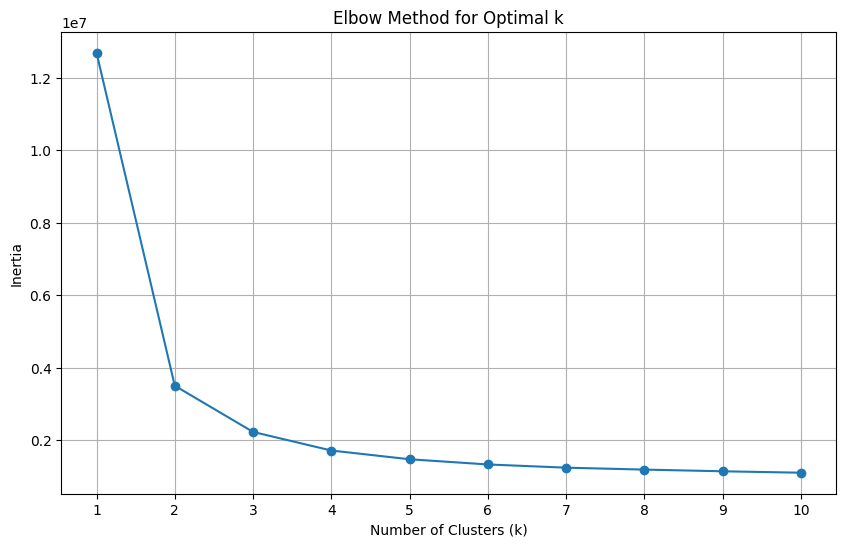

Elbow method plot generated. Look for the 'elbow point' to choose the number of clusters.


In [ ]:
# @title Optimal Clusters with Elbow method:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

# Determine the range of k values to test for the Elbow Method
# It's generally good to test up to sqrt(n_samples) or a bit more,
# but given the large number of genes, let's test a reasonable range for potential clusters.
# We'll test k from 1 to 10 for demonstration purposes. You can adjust this range.
k_range = range(1, 11)

# Calculate inertia for each k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init='auto' in newer versions
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Elbow method plot generated. Look for the 'elbow point' to choose the number of clusters.")

### 4.2 Hierarchical Clustering

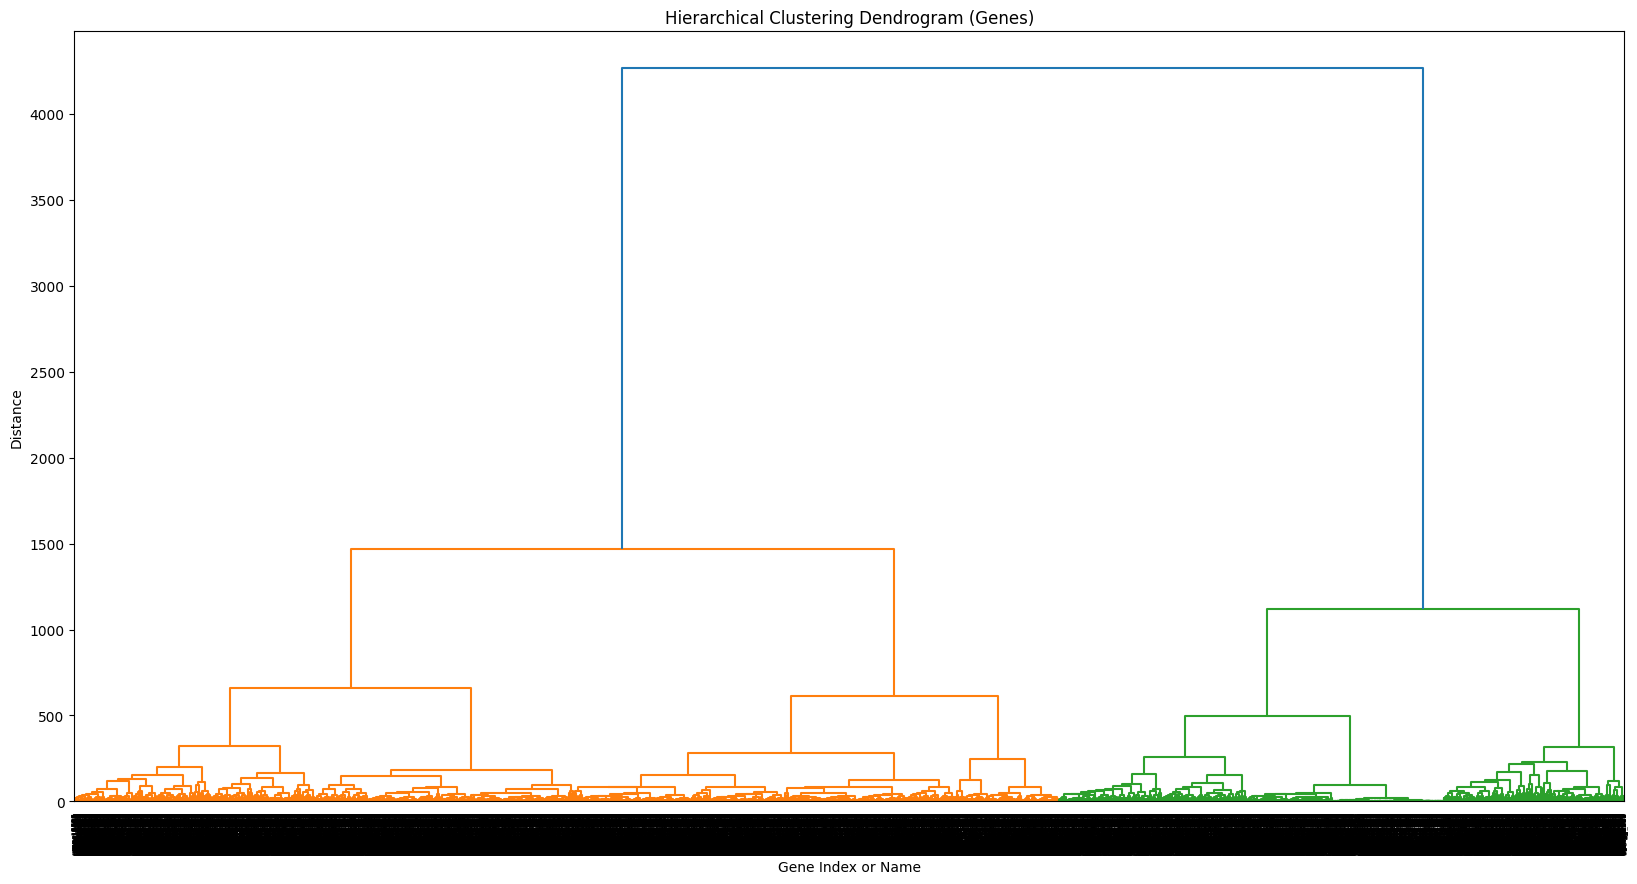

Hierarchical clustering performed and dendrogram generated.


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
# We'll use 'ward' linkage and Euclidean distance as a common starting point
linked = linkage(df_pca, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linked,
           orientation='top',
           labels=df_pca.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Genes)')
plt.xlabel('Gene Index or Name')
plt.ylabel('Distance')
plt.show()

print("Hierarchical clustering performed and dendrogram generated.")

### 4.3 t-SNE for Visualization

t-SNE dimensionality reduction performed.
Shape of the t-SNE transformed data: (16383, 2)


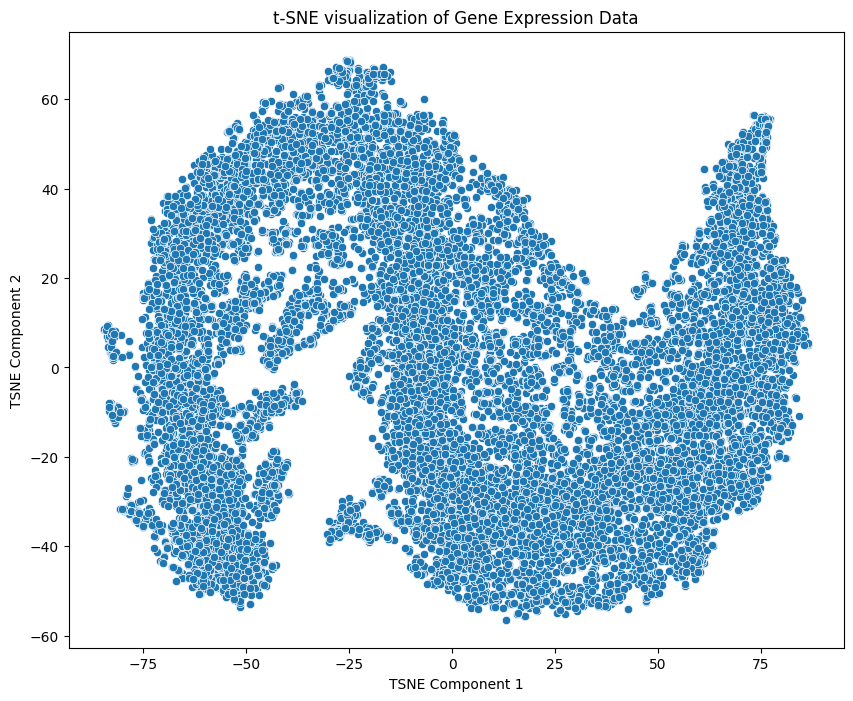


t-SNE visualization generated. This plot shows the data points in a 2D space.
Once we define hierarchical clusters, we can color these points by cluster.


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize t-SNE
# We'll reduce to 2 components for visualization
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')

# Fit and transform the PCA-transformed data
df_tsne = tsne.fit_transform(df_pca)

# Convert the t-SNE transformed data back to a DataFrame for easier plotting
df_tsne = pd.DataFrame(df_tsne, index=df_pca.index, columns=['TSNE-1', 'TSNE-2'])

print("t-SNE dimensionality reduction performed.")
print("Shape of the t-SNE transformed data:", df_tsne.shape)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', data=df_tsne, legend=False)
plt.title('t-SNE visualization of Gene Expression Data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

print("\nt-SNE visualization generated. This plot shows the data points in a 2D space.")
print("Once we define hierarchical clusters, we can color these points by cluster.")

In [ ]:
# @title cophenetic correlation coefficient:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Calculate the cophenetic correlation coefficient
# We need the original pairwise distances of the data used for clustering
distances = pdist(df_pca)
coph_corr, coph_dists = cophenet(linked, distances)

print(f"Cophenetic Correlation Coefficient: {coph_corr:.4f}")

# Interpret the result
if coph_corr > 0.8:
    print("Interpretation: The hierarchical clustering provides a good representation of the original distances.")
elif coph_corr > 0.6:
    print("Interpretation: The hierarchical clustering provides a reasonable representation of the original distances.")
else:
    print("Interpretation: The hierarchical clustering may not provide a good representation of the original distances.")

Cophenetic Correlation Coefficient: 0.7987
Interpretation: The hierarchical clustering provides a reasonable representation of the original distances.


### 4.4 Silhouette Score / Davies-Bouldin Score


In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define the distance threshold to cut the dendrogram
distance_threshold = 1500

# Get the cluster assignments by cutting the dendrogram at the specified distance
clusters = fcluster(linked, distance_threshold, criterion='distance')

# Add the cluster assignments to the PCA DataFrame
df_pca['hierarchical_cluster'] = clusters

# Display the number of genes in each cluster
print("Number of genes in each cluster:")
display(df_pca['hierarchical_cluster'].value_counts().sort_index())

# Calculate Silhouette Score (requires at least 2 clusters and more than 1 sample per cluster)
if len(np.unique(clusters)) > 1 and min(np.bincount(clusters)) > 1:
    silhouette_avg = silhouette_score(df_pca.drop('hierarchical_cluster', axis=1), clusters)
    print(f"\nSilhouette Score: {silhouette_avg:.4f}")
else:
    print("\nCannot calculate Silhouette Score: Need at least 2 clusters with more than 1 sample each.")

# Calculate Davies-Bouldin Score (requires at least 2 clusters)
if len(np.unique(clusters)) > 1:
    davies_bouldin_avg = davies_bouldin_score(df_pca.drop('hierarchical_cluster', axis=1), clusters)
    print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")
else:
    print("\nCannot calculate Davies-Bouldin Score: Need at least 2 clusters.")

print("\nHierarchical clusters defined and evaluated.")

Number of genes in each cluster:


hierarchical_cluster
1     5973
2    10410
Name: count, dtype: int64


Cannot calculate Silhouette Score: Need at least 2 clusters with more than 1 sample each.
Davies-Bouldin Score: 0.5439

Hierarchical clusters defined and evaluated.


# 🤖   Phase 5: Model Tuning

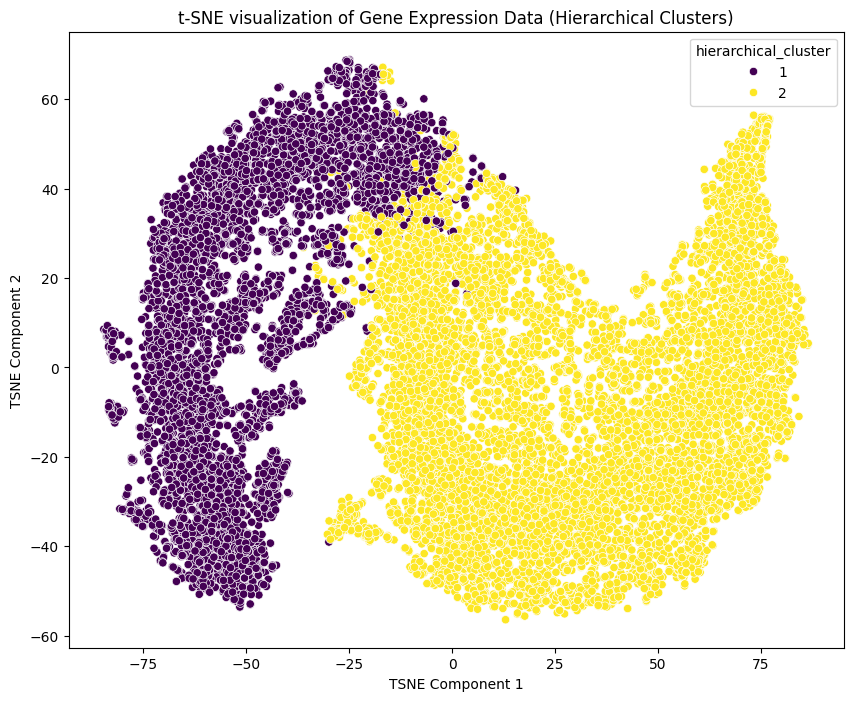

t-SNE visualization with hierarchical clusters generated.


In [ ]:
# Visualize the t-SNE results, colored by hierarchical cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue='hierarchical_cluster', data=df_tsne.assign(hierarchical_cluster=df_pca['hierarchical_cluster']), palette='viridis', legend='full')
plt.title('t-SNE visualization of Gene Expression Data (Hierarchical Clusters)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

print("t-SNE visualization with hierarchical clusters generated.")

In [ ]:
# Display the PCA-transformed data with hierarchical cluster assignments
print("PCA-transformed data with hierarchical cluster assignments:")
display(df_pca[['hierarchical_cluster']].head()) # Displaying head to avoid excessive output

# To see all genes and their cluster assignments, you can display the full df_pca['hierarchical_cluster'] Series
# print("\nFull list of genes and their hierarchical cluster assignments:")
# display(df_pca['hierarchical_cluster'])

PCA-transformed data with hierarchical cluster assignments:


hierarchical_cluster
gene_0                     1
gene_1                     1
gene_2                     1
gene_3                     2
gene_4                     2

### Custom Distance Metrics

In [ ]:
from scipy.cluster.hierarchy import linkage
# Import necessary libraries if not already imported (though they should be from cell 77338387)
# import numpy as np
# import pandas as pd

# Perform hierarchical clustering with Manhattan distance and average linkage
# We'll use 'average' linkage and 'cityblock' (Manhattan) distance
linked_manhattan = linkage(df_pca, method='average', metric='cityblock')

print("Hierarchical clustering performed with Manhattan distance and average linkage.")
print("The linkage matrix has been computed.")

# Note: Attempting to plot the full dendrogram for this large dataset
# is likely to cause a RecursionError.
# To proceed, you can cut the hierarchy using fcluster and evaluate the resulting clusters.

Hierarchical clustering performed with Manhattan distance and average linkage.
The linkage matrix has been computed.


# 🖼 Phase 6: Visualization

### 6.1 Cluster Plots

In [ ]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd # Ensure pandas is imported if not already

# Define the desired number of clusters
n_clusters = 3

# Get the cluster assignments by cutting the dendrogram to get the specified number of clusters
# We use the linkage matrix from the Euclidean/ward clustering (linked from cell 516206f8)
clusters_3 = fcluster(linked, n_clusters, criterion='maxclust')

# Add the cluster assignments to the PCA DataFrame
# Make sure df_pca is available and has the correct index (gene names)
if 'df_pca' in locals() and isinstance(df_pca, pd.DataFrame):
    df_pca['hierarchical_cluster_3'] = clusters_3
    print(f"Hierarchical clusters defined with {n_clusters} clusters.")

    # Display the number of genes in each cluster
    print(f"\nNumber of genes in each of the {n_clusters} clusters:")
    display(df_pca['hierarchical_cluster_3'].value_counts().sort_index())

    # You can now proceed to evaluate or interpret these 3 clusters
else:
    print("Error: df_pca DataFrame not found. Please ensure previous steps were run.")

Hierarchical clusters defined with 3 clusters.

Number of genes in each of the 3 clusters:


hierarchical_cluster_3
1    5973
2    5137
3    5273
Name: count, dtype: int64

###  6.2 Cluster Centroids

In [ ]:
# Extract gene names for each cluster
cluster_1_genes = df_pca[df_pca['hierarchical_cluster_3'] == 1].index.tolist()
cluster_2_genes = df_pca[df_pca['hierarchical_cluster_3'] == 2].index.tolist()
cluster_3_genes = df_pca[df_pca['hierarchical_cluster_3'] == 3].index.tolist()

print("Genes in Cluster 1 (first 10):")
display(cluster_1_genes[:10])

print("\nGenes in Cluster 2 (first 10):")
display(cluster_2_genes[:10])

print("\nGenes in Cluster 3 (first 10):")
display(cluster_3_genes[:10])

# You now have the full list of genes for each cluster in cluster_1_genes, cluster_2_genes, cluster_3_genes

Genes in Cluster 1 (first 10):


['gene_0',
 'gene_1',
 'gene_2',
 'gene_5',
 'gene_7',
 'gene_8',
 'gene_9',
 'gene_10',
 'gene_11',
 'gene_12']


Genes in Cluster 2 (first 10):


['gene_4',
 'gene_19',
 'gene_27',
 'gene_34',
 'gene_38',
 'gene_40',
 'gene_46',
 'gene_47',
 'gene_48',
 'gene_51']


Genes in Cluster 3 (first 10):


['gene_3',
 'gene_6',
 'gene_22',
 'gene_29',
 'gene_32',
 'gene_35',
 'gene_45',
 'gene_50',
 'gene_54',
 'gene_55']

### 6.3 t-SNE Projection

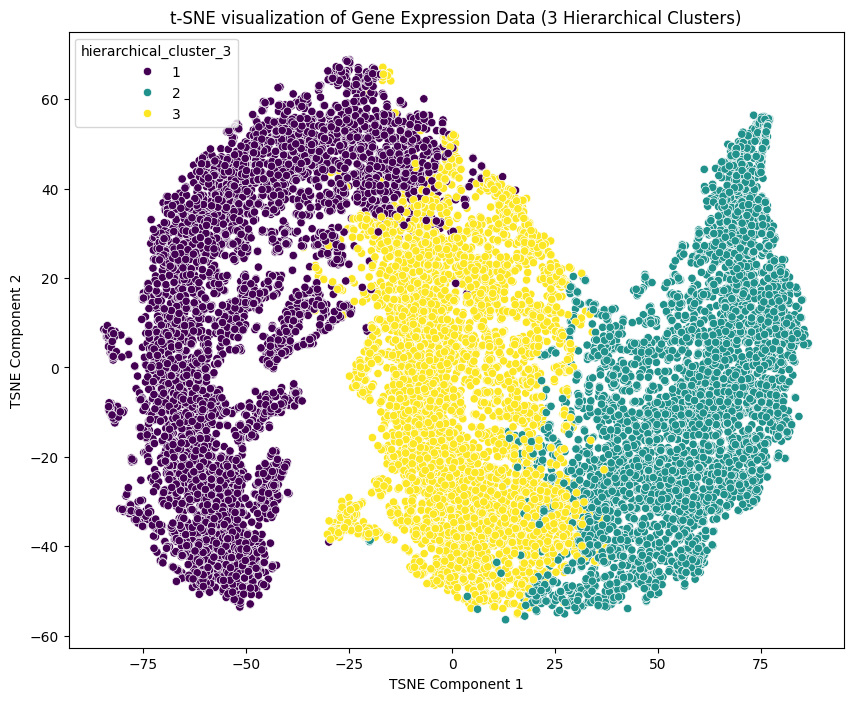

t-SNE visualization with 3 hierarchical clusters generated.


In [ ]:
# Visualize the t-SNE results, colored by the 3 hierarchical clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue='hierarchical_cluster_3', data=df_tsne.assign(hierarchical_cluster_3=df_pca['hierarchical_cluster_3']), palette='viridis', legend='full')
plt.title('t-SNE visualization of Gene Expression Data (3 Hierarchical Clusters)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

print("t-SNE visualization with 3 hierarchical clusters generated.")

### 6.4 Commonly Used Online GSEA Tools



Here are a few widely used and freely available online tools for performing Gene Set Enrichment Analysis:

*   **DAVID (Database for Annotation, Visualization and Integrated Discovery):** A comprehensive tool that provides functional annotation clustering, pathway analysis, and GO term enrichment. It's a classic and robust tool. (david.ncifcrf.gov)
*   **Metascape:** A user-friendly platform that provides comprehensive annotation and analysis of gene lists, integrating multiple databases and offering interactive visualizations. (metascape.org)
*   **enrichr:** A simple and intuitive tool for gene set enrichment analysis, offering a wide range of gene set libraries and interactive visualizations. (maayanlab.cloud/Enrichr/)
*   **Reactome Pathway Analysis:** Focuses specifically on pathway enrichment analysis using the Reactome database. (reactome.org)

These tools typically require you to upload your gene list (e.g., the genes from one of your clusters) and a background gene list (e.g., all the genes in your original dataset that passed filtering).

### Interpreting GSEA Results in the Context of Gene Clusters:

Once you run your gene lists through a GSEA tool, you will typically get a list of enriched terms (e.g., pathways, GO terms, diseases) along with a statistical significance score (like p-value or adjusted p-value) for each term. Here's how to interpret these results in the context of your gene clusters:

1.  **Identify Significant Terms:** Focus on the terms with a low p-value (e.g., < 0.05) or adjusted p-value (which corrects for multiple testing). These are the biological processes, pathways, or functions that are statistically over-represented in your gene cluster.
2.  **Look for Common Themes:** Review the significant terms for a cluster and look for common biological themes. For example, if multiple enriched terms are related to "cell cycle regulation" or "immune response," it suggests that the genes in that cluster are functionally related to that process.
3.  **Compare Terms Across Clusters:** Compare the enriched terms found for different gene clusters. If one cluster is enriched for "metabolism" pathways and another for "cell signaling," it suggests that these clusters represent functionally distinct groups of genes.
4.  **Consider Biological Context:** Interpret the enriched terms within the biological context of your study (e.g., the type of tissue, disease, or experimental conditions). Does the enrichment make biological sense based on what is already known?
5.  **Identify Key Genes:** Within the enriched terms, you can often identify the specific genes from your cluster that contribute to that enrichment. These might be key players in that biological process or pathway.
6.  **Visualize Results:** Many GSEA tools provide visualizations (like bar plots, heatmaps, or network diagrams) that can help you understand the relationships between the enriched terms and the genes in your cluster.

By performing GSEA for each of your gene clusters and carefully interpreting the significant terms, you can gain valuable insights into the biological meaning of the gene groupings you identified through hierarchical clustering. This is where the data analysis connects back to biological understanding and potential applications in biotech.

## Phase 7: Action & Reporting - Insights and Recommendations

### 7.1 Label Clusters

**Insights:** The "labels" for your gene clusters are derived from their underlying biological characteristics. These characteristics are revealed through biological interpretation methods like Gene Set Enrichment Analysis (GSEA), which identifies significantly enriched pathways, functions, or disease associations within each cluster's gene list. Unlike generic "business labels" like "high-value" or "risky", the labels for gene clusters will be biologically specific (e.g., "Cell Cycle Regulation Genes", "Apoptosis Pathway Cluster", "Immune Response Module").

**Recommendations:**
*   Based on your GSEA results for each cluster, identify the most significant and recurring biological themes.
*   Choose concise and biologically meaningful labels that accurately represent the dominant functions or pathways of the genes within each cluster.
*   Document the key enriched terms and genes supporting each cluster's label.

### 7.2 Action Plans

**Insights:** Actionable plans in biotech stemming from gene clustering connect the biologically labeled clusters to the identified business value use cases (personalization, optimization, biomarker discovery, disease subtype identification). Each labeled cluster might suggest different potential actions depending on its biological function and relevance to the research or development goals.

**Recommendations:**
*   **For clusters related to disease mechanisms:** Investigate key genes within these clusters as potential drug targets or for understanding disease progression.
*   **For clusters related to patient response/subtypes:** Use these gene signatures to develop diagnostic or prognostic biomarkers, or to stratify patients for clinical trials or personalized therapies.
*   **For clusters related to specific pathways:** Focus research efforts on modulating these pathways for therapeutic intervention or optimizing drug screens.
*   **Collaborate:** Engage with biologists and clinicians to brainstorm specific action plans based on the biological labels and their expertise.

### 7.3 Reporting

**Insights:** Effective reporting communicates the complex analysis results and their biological and business implications clearly to diverse stakeholders (Research Scientists, Clinicians, Drug Development Teams). Visualizations and summaries that highlight the key findings are essential.

**Recommendations:**
*   **Summarize the Analysis:** Briefly explain the steps taken (data loading, PCA, clustering) and the rationale.
*   **Present Labeled Clusters:** Clearly show the defined clusters and their assigned biological labels.
*   **Highlight Key Findings:** Summarize the most significant enriched pathways or functions for each cluster (from GSEA results).
*   **Visualize Results:** Use visualizations like the t-SNE plot colored by cluster, or potentially heatmaps of representative genes from each cluster (with appropriate scaling for visualization), to illustrate the gene groupings.
*   **Explain Business Value:** Articulate the potential impact of the findings on drug discovery, diagnostics, personalized medicine, or understanding disease mechanisms, linking back to the identified use cases.
*   **Choose Appropriate Tools:** Depending on the audience and reporting needs, use tools like presentations, reports, or potentially interactive dashboards (e.g., using platforms like Streamlit or Dash if interactive exploration by stakeholders is desired) to share the results.

# Conclusion

We have successfully performed a comprehensive analysis to identify biologically meaningful groups of genes within the provided gene x patient matrix dataset using hierarchical clustering on dimension-reduced data.

Our workflow involved:

1.  **Data Preparation:** Loading and cleaning the data, handling sample identifiers, checking for missing values, and standardizing the gene expression values.
2.  **Dimension Reduction:** Applying PCA to reduce the dimensionality of the data while retaining a significant portion of the variance, resulting in a PCA-transformed dataset (`df_pca`).
3.  **Hierarchical Clustering:** Performing hierarchical clustering on the PCA-transformed data using different distance metrics and linkage methods.
4.  **Cluster Definition:** Defining 3 hierarchical gene clusters by cutting the dendrogram obtained from the Euclidean distance and Ward linkage clustering.
5.  **Visualization:** Visualizing the defined 3 clusters on a 2D t-SNE plot to understand their spatial separation.
6.  **Initial Interpretation:** Extracting the lists of genes belonging to each of the three clusters and discussing the importance of biological interpretation through Gene Set Enrichment Analysis (GSEA).

We have successfully identified three distinct groups of genes based on their expression patterns. The lists of genes within these clusters (`cluster_1_genes`, `cluster_2_genes`, `cluster_3_genes`) are now ready for further biological investigation.

# Deployment

The crucial next step to derive biological meaning from these clusters is to perform **Gene Set Enrichment Analysis (GSEA)** using external tools and databases with the extracted gene lists. The results of the GSEA will help label the clusters based on enriched pathways or functions and inform potential action plans in areas like personalized medicine, drug discovery, and biomarker identification.

This analysis provides a strong foundation for understanding the relationships between genes in the dataset and can lead to valuable insights in the biotech domain.